# Increasing Kaggle Revenue: Analyzing user data to recommend the best new product

In this project, we will create recommendations for increasing revenue at Kaggle, an online community for data science professionals. We will analyze a Kaggle customer survey, attempting to learn if there are any indicators of potential revenue growth for the company. To make our recommendations, we will try to learn:

* Is there market potential for a "fremium" kernel product?
* Is there market potential for a counsulting marketplace?
* Based on current user data, which is more likely to be more profitable?

## Summary of Observations

* Over 60% of Kaggle's users earn less than $50k per year, and are unlikely to spend discretionary income on a higher-tier subscription. In addition, over 58% of users work in companies of less than 1,000 employees. Companies willing to invest in a costly enterprise solution seem to be a small segment of Kaggle's current user base.
* Although subscription services can drive long-term revenue through creating the "strategic value" of an increased user base, Kaggle seems unlikely to gain a significant amount of new users through offering the freemium product.
* Users of Kaggle's current products are highly educated, largely based outside the US, and tend toward the lower tiers of salary compensation. All of these factors could make Kaggle users very promising candidates for high-quality remote contract work on Data Science projects.

## Summary of Recommendations

The results of Kaggle's user survey show that **Kaggle is more likely to drive significant future revenue from a monetized consultant marketplace, rather than a freemium kernel product.** It would be difficult to recoup a significant investment in developing a freemium kernel product, and Kaggle's current userbase makes it unlikely to draw significant market share away from GitHub and other existing products. In contrast, given their competent and geographically diverse user base, a robust Data Science contractor marketplace should result in a more significant increase of revenue.

For more details and a thorough description of the methodology of this report, please see below.

# Methodology #

## Data Source ##
The data for this project is taken from a publicly-released [Kaggle competition](https://www.kaggle.com/c/kaggle-survey-2019). The survey was deployed from October 8-28, 2019, and responses were taken largely from Kaggle-related channels (email list, social media, and discussion forums). The survey received 19,717 useable responses, and filtered out any responses that were flagged automatically as "Spam."

## Area of interest ##
An outline of some of Kaggle's future potential revenue streams can be found in [an article posted by Kaggle's founder, Anthony Goldbloom](https://www.quora.com/How-does-Kaggle-make-money), on Quora.com. In this post, Anthony Goldbloom lays out several current revenue streams for Kaggle:

* Featured competitions
* Recruiting competitions
* Research competitions

In addition, Goldbloom lays out several services Kaggle was planning on adding to generate revenue:

* Making [Kaggle kernels](http://www.kaggle.com/kernels_) a freemium service, to which companies will subscribe as a team collaboration space.
* A "data science marketplace for consulting help."

As of the writing of this report (November 25, 2019), neither of these options are visibly listed on the Kaggle website, and are thus both potential revenue sources.

## Hypothesis ##

The "team collaboration" space is currently dominated by [GitHub](https://github.com/), which also uses a freemium service to make money via Enterprise subscriptions. GitHub was recently aquired by Microsoft for 7.5 billion, and the purchase price was driven largely by the opportunity provided in GitHub's collaborative network. According to [Harvard Business Review](https://hbr.org/2018/06/why-microsoft-is-willing-to-pay-so-much-for-github):

> In other words, Microsoft is not paying 7.5 billion for GitHub for its ability to make money (its financial value). It’s paying for the access it gets to the legions of developers who use GitHub’s code repository products on a daily basis (the company’s strategic value) — so they can be guided into the Microsoft developer environment, where the real money is made.

With this in mind, potential revenue for Kaggle is not simply based on potential subscription dollars, but on what, if any, marketshare Kaggle can take from GitHub in this domain. As a result, it is a resonable hypothesis that **given Kaggle's current customer base, a Kernels freemium service would provide greater potential for future revenue than a data science consulting marketplace.**

## Required Data needed ##

To test this hypothesis, we need to explore:

* Information on demographics and expertise of current customers
* Information on size of customers' data science teams (most likely to utilize a kernel-based system)
* Information on % of users employed in large-budget companies (most likely to purchase enterprise system)
* Information on % of users with significant education and Data Science experience (most likely to generate high-dollar revenue in consulting marketplace)

In addition, we will explore other demographics provided in the dataset to see if any other potential hypotheses emerge.

## Assumptions ##

It is important to note several key assumptions that are informing this analysis.

**1. The survey data is representative of Kaggle's overall customer base.**
With the available data, it is impossible to know if this survey is representative of the overall population of Kaggle customers. Selection bias is likely present in some form. However, given the large number of responses in the survey, it is likely a reliable source for the purpose of this analysis.

**2. A new freemium kernel product would be structured much like others in the domain, with a paid subscription tier and larger-team enterprise level tier.**
This is the strategy used by [GitHub](https://github.com/enterprise), the leader in this space, as well as most other freemium services.

**3. In order for Kaggle to make significant revenue from a freemium kernel product, they will need a base of current customers with the financial means to subscribe.**
This requires a large group of either users with discretionary income to spend on subscriptions, or employees of large companies with the budget and need for enterprise subscriptions.

# Data Cleaning #

To begin, we import and clean the dataset provided from Kaggle. Four datasets are provided, which we will read in as separate files. The `'survey_schema'` file shows that not all questions were given to all participants, which is helpful in understanding null values in the larger dataset.

Only the `'mc_responses.csv'` file, which contains the answers to all multiple choice questions, will be relevant for this analysis.

In [156]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

# reading in csv file
mc = pd.read_csv('mc_responses.csv')

In [157]:
# exploring overall data
mc.info()
mc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19718 entries, 0 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.0+ MB


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [158]:
# Reassigning header to first row and removing first row
mc.columns = mc.iloc[0,:]
mc = mc[1:]
mc.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,...,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Access,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Relational Database Service,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS DynamoDB,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Azure SQL Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud SQL,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Other - Text
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [159]:
# Remove duplicates
mc = mc.drop_duplicates()
print(len(mc))

19713


In [160]:
# Removing "text" columns
text_columns = mc.filter(regex=(".*\ Text$"))
mc.drop(text_columns.columns, axis=1, inplace=True)

In [161]:
# Making column names readable
mc.columns.values

array(['Duration (in seconds)', 'What is your age (# years)?',
       'What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
       'What is the size of the company where you are employed?',
       'Approximately how many individuals are responsible for data science workloads at your place of business?',
       'Does your current employer incorporate machine learning methods into their business?',
       'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions',
       'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice

**Note:** The dataset contains several multiple-choice categories which are broken over several columns, each with a single response. For ease of use, we can aggregate these columns into a single category for each question, and remove the individual response columns.

In [162]:
## Creating 'activities' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions':
                   'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['activities'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions':
                   'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [163]:
## Creating 'fav_media' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)':
                   'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['fav_media'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)':
                   'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [164]:
## Creating 'dscourse_platforms' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity':
                   'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['dscourse_platforms'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity':
                   'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [165]:
## Creating 'ides_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc) ":
                   "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other"].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ides_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc) ":
                   "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other"]
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [166]:
## Creating 'notebooks_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks (Kernels) ':
                   'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['notebooks_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks (Kernels) ':
                   'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [167]:
## Creating 'langs_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python':
                   'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['langs_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python':
                   'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [168]:
## Creating 'dataviz_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Ggplot / ggplot2 ':
                   'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['dataviz_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Ggplot / ggplot2 ':
                   'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [169]:
## Creating 'hardware_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - CPUs':
                   'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['hardware_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - CPUs':
                   'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [170]:
## Creating 'ml_alg_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression':
                   'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ml_alg_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression':
                   'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [171]:
## Creating 'ml_tools_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)':
                   'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ml_tools_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)':
                   'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [172]:
## Creating 'cvision_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)':
                   'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['cvision_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)':
                   'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [173]:
## Creating 'nlp_methods_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)':
                   'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['nlp_methods_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)':
                   'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [174]:
## Creating 'ml_frameworks_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn ':
                   'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ml_frameworks_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn ':
                   'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [175]:
## Creating 'cloud_platform_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) ':
                   'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['cloud_platform_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) ':
                   'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [176]:
## Creating 'cloud_products_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Elastic Compute Cloud (EC2)':
                   'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['cloud_products_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Elastic Compute Cloud (EC2)':
                   'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [177]:
## Creating 'bigdataanalytics_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice - Google BigQuery':
                   'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['bigdataanalytics_used_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice - Google BigQuery':
                   'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [178]:
## Creating 'ml_products_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice - SAS':
                   'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ml_products_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice - SAS':
                   'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [179]:
## Creating 'automl_tools_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google AutoML ':
                   'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['automl_tools_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google AutoML ':
                   'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [180]:
## Creating 'reldb_products_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL':
                   'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['reldb_products_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL':
                   'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [181]:
# Making column names readable
column_clean = {'Duration (in seconds)':'duration',
                'What is your age (# years)?':'age',
                'What is your gender? - Selected Choice':'gender',
                'In which country do you currently reside?':'country',
                'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'education',
                'Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'title',
                'What is the size of the company where you are employed?':'comp_size',
                'Approximately how many individuals are responsible for data science workloads at your place of business?':'ds_teamsize',
                'Does your current employer incorporate machine learning methods into their business?':'use_ml',
                'What is your current yearly compensation (approximate $USD)?':'compensation',
                'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?':'dollars_mlorcloud',
                'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice':'prim_analaysistool',
                'How long have you been writing code to analyze data (at work or at school)?':'coding_years',
                'Have you ever used a TPU (tensor processing unit)?':'used_tpu',
                'For how many years have you used machine learning methods?':'ml_years'}
mc = mc.rename(columns=column_clean)

In [182]:
#replacing null str with NaN
mc = mc.replace('None', np.nan)
mc = mc.replace('', np.nan)

In [183]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19713 entries, 1 to 19717
Data columns (total 34 columns):
duration                      19713 non-null object
age                           19713 non-null object
gender                        19713 non-null object
country                       19713 non-null object
education                     19323 non-null object
title                         19107 non-null object
comp_size                     14002 non-null object
ds_teamsize                   13623 non-null object
use_ml                        13227 non-null object
compensation                  12497 non-null object
dollars_mlorcloud             12250 non-null object
prim_analaysistool            15690 non-null object
coding_years                  15627 non-null object
used_tpu                      14203 non-null object
ml_years                      14182 non-null object
activities                    9226 non-null object
fav_media                     16206 non-null object
dscourse

In [184]:
# Checking for remaining null values
mc.apply(lambda x: sum(x.notnull()))

0
duration                      19713
age                           19713
gender                        19713
country                       19713
education                     19323
title                         19107
comp_size                     14002
ds_teamsize                   13623
use_ml                        13227
compensation                  12497
dollars_mlorcloud             12250
prim_analaysistool            15690
coding_years                  15627
used_tpu                      14203
ml_years                      14182
activities                     9226
fav_media                     16206
dscourse_platforms            15078
ides_used                     14389
notebooks_used                 9266
langs_used                    14404
dataviz_used                  13013
hardware_used                 14218
ml_alg_used                   12902
ml_tools_used                  6093
cvision_used                   4289
nlp_methods_used               2555
ml_frameworks_used        

### Cleaning Observations ###
After inital exploration, cleaning and consolidation, it seems the data is comprised entirely of `str` objects, rather than numerical values. Several categories are already broken down into broad category bins, which will be helpful for a quick analysis. The number of null values in later categories is to be expected, given the schema of the survey. However, most of these categories are probably not of significant interest for this analysis.

There are still a large number of null values for some categories which are of interest: `'comp_size'`, `'ds_teamsize'`, `'use_ml'`, `'compensation'`, and `'dollars_mlorcloud`'. However, even after subtracting the null values, there are over 12,000 data points in each of these categories, which should be more than enough for meaningful analysis.

# Exploratory Data Analysis (EDA)

We begin by analyzing categorical variables that are most relevant to our analysis. First, we create a frequency table and bar-graph visualization for each variable.

In [185]:
#Filter categorical variables
categorical_columns = [x for x in mc.dtypes.index if mc.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in mc if x not in ['duration', 'activities', 'fav_media', 'dscourse_platforms', 'ides_used',
                      'notebooks_used', 'langs_used', 'dataviz_used', 'hardware_used', 'ml_alg_used',
                      'ml_tools_used', 'cvision_used', 'nlp_methods_used', 'ml_frameworks_used',
                      'cloud_platform_used', 'cloud_products_used', 'bigdataanalytics_used_used',
                      'ml_products_used', 'automl_tools_used', 'reldb_products_used']]
#Print frequency of all relevant categories
for col in categorical_columns:
    print('\nFrequency of Categories for %s'%col)
    print(mc[col].value_counts())


Frequency of Categories for age
25-29    4458
22-24    3609
30-34    3120
18-21    2499
35-39    2087
40-44    1439
45-49     949
50-54     692
55-59     422
60-69     338
70+       100
Name: age, dtype: int64

Frequency of Categories for gender
Male                       16134
Female                      3212
Prefer not to say            318
Prefer to self-describe       49
Name: gender, dtype: int64

Frequency of Categories for country
India                                                   4783
United States of America                                3084
Other                                                   1054
Brazil                                                   728
Japan                                                    673
Russia                                                   626
China                                                    574
Germany                                                  531
United Kingdom of Great Britain and Northern Ireland     482
Canada  

In [186]:
# Creating Age Frequency Table
age_freq = mc['age'].value_counts(normalize=True)
age_freq = age_freq.sort_index(axis=0)
age_freq = age_freq.reset_index()
age_freq = pd.DataFrame(age_freq)

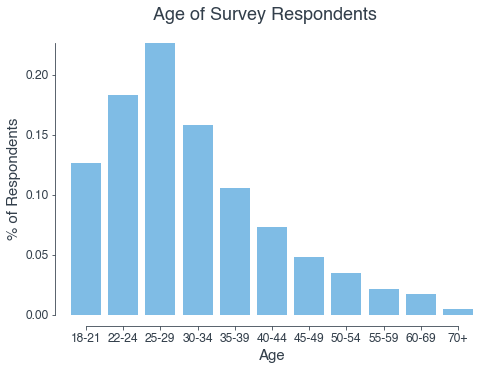

In [187]:
# Setting style for bar graphs
import matplotlib.pyplot as plt
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(age_freq.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=age_freq['age'], color='#007ACC', alpha=0.5, linewidth=30)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Age', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, age_freq['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.1, 0)

# add title
fig.suptitle('Age of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('age_freq.png', dpi=300, bbox_inches='tight')

In [188]:
# Creating Gender Frequency Table
gender_freq = mc['gender'].value_counts(normalize=True)
gender_freq = gender_freq.reset_index()
gender_freq = gender_freq.sort_index(axis=0)
gender_freq = pd.DataFrame(gender_freq)

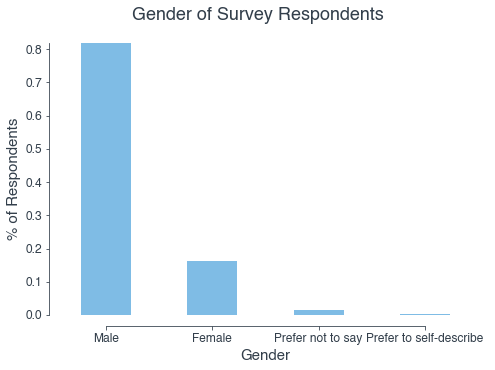

In [189]:
# Creating Gender Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(gender_freq.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=gender_freq['gender'], color='#007ACC', alpha=0.5, linewidth=50)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Gender', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, gender_freq['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.2, 0)

# add title
fig.suptitle('Gender of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('gender_freq.png', dpi=300, bbox_inches='tight')

In [190]:
# Renaming long value name
mc['country'] = mc['country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
mc['country'] = mc['country'].replace('United States of America', 'USA')
# Creating Country Frequency Table
country_freq = mc['country'].value_counts(normalize=True, ascending=False)
#country_freq = country_freq.sort_index(axis=0)
country_freq = country_freq.reset_index()
country_freq = pd.DataFrame(country_freq)
country_freq = country_freq.loc[country_freq['country'] >= .01]

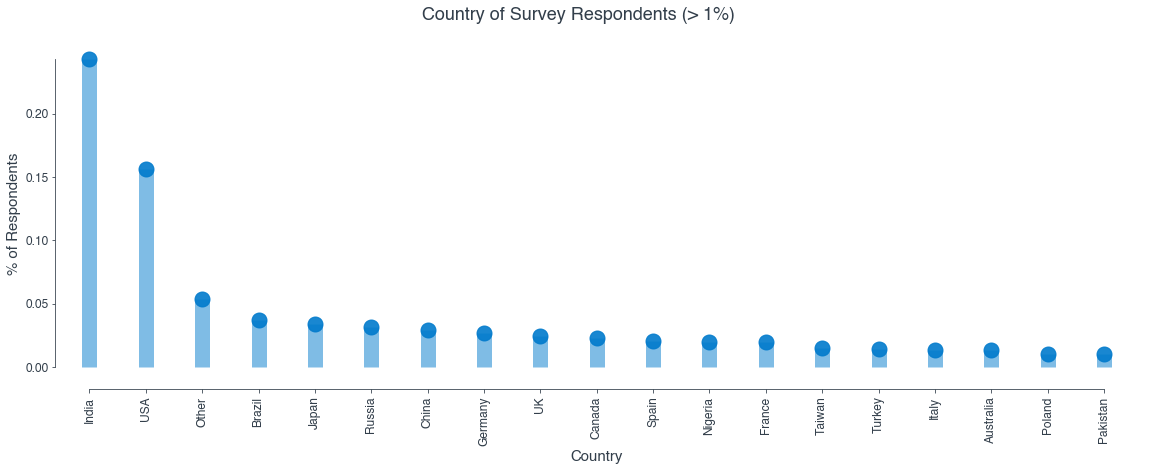

In [191]:
# Creating Country Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(country_freq.index)+1))

fig, ax = plt.subplots(figsize=(20,6))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=country_freq['country'], color='#007ACC', alpha=0.5, linewidth=15)

# create for each bin a dot at the level of the expense percentage value
plt.plot(my_range, country_freq['country'], "o", markersize=15, color='#007ACC', alpha=0.9)

# set labels
ax.set_xlabel('Country', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, country_freq['index'], rotation=45)

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.05, 0.03)
ax.set_xticklabels(country_freq['index'], rotation=90)

# add title
fig.suptitle('Country of Survey Respondents (> 1%)', fontsize=18, fontweight='black')

plt.savefig('country_freq.png', dpi=300, bbox_inches='tight')

In [192]:
# Renaming long descriptors
mc['education'] = mc['education'].replace("Some college/university study without earning a bachelor’s degree", 'Some college')
mc['education'] = mc['education'].replace('No formal education past high school', 'High School')

# Creating Education Frequency Table
education_freq = mc['education'].value_counts(normalize=True)
education_freq = education_freq.reset_index()
gender_freq = education_freq.sort_index(axis=0)
education_freq = pd.DataFrame(education_freq)

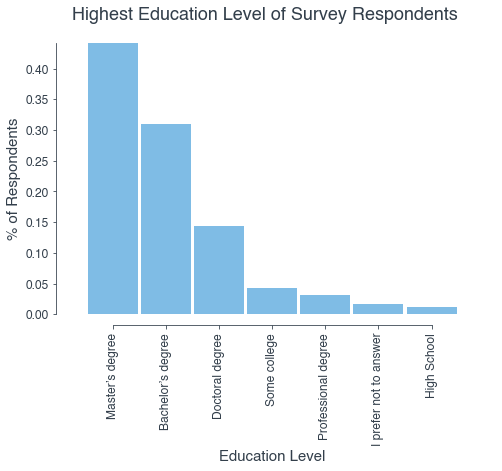

In [193]:
# Creating Education Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(education_freq.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=education_freq['education'], color='#007ACC', alpha=0.5, linewidth=50)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Education Level', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, education_freq['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.2, 0)
ax.set_xticklabels(education_freq['index'], rotation=90)

# add title
fig.suptitle('Highest Education Level of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('education_freq.png', dpi=300, bbox_inches='tight')

In [194]:
# Creating Title Frequency Table
title_freq = mc['title'].value_counts(normalize=True)
title_freq = title_freq.reset_index()
title_freq = title_freq.sort_index(axis=0)
title_freq = pd.DataFrame(title_freq)

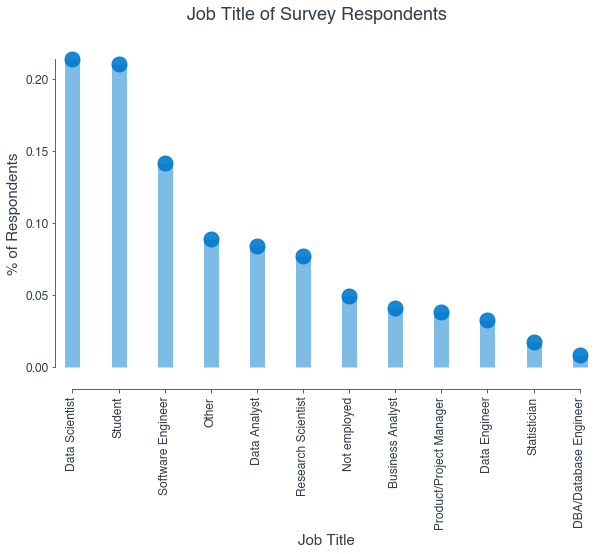

In [195]:
# Creating Title Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(title_freq.index)+1))

fig, ax = plt.subplots(figsize=(10,6))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=title_freq['title'], color='#007ACC', alpha=0.5, linewidth=15)

# create for each bin a dot at the level of the expense percentage value
plt.plot(my_range, title_freq['title'], "o", markersize=15, color='#007ACC', alpha=0.9)

# set labels
ax.set_xlabel('Job Title', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, title_freq['index'], rotation=45)

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.05, 0.03)
ax.set_xticklabels(title_freq['index'], rotation=90)

# add title
fig.suptitle('Job Title of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('title_freq.png', dpi=300, bbox_inches='tight')

In [196]:
# Creating Data Science Team Size Frequency Table
ds_teamsize_freq = mc['ds_teamsize'].value_counts(normalize=True)
ds_teamsize_freq = ds_teamsize_freq.reset_index()
ds_teamsize_freq = ds_teamsize_freq.sort_index(axis=0)
ds_teamsize_freq = pd.DataFrame(ds_teamsize_freq)

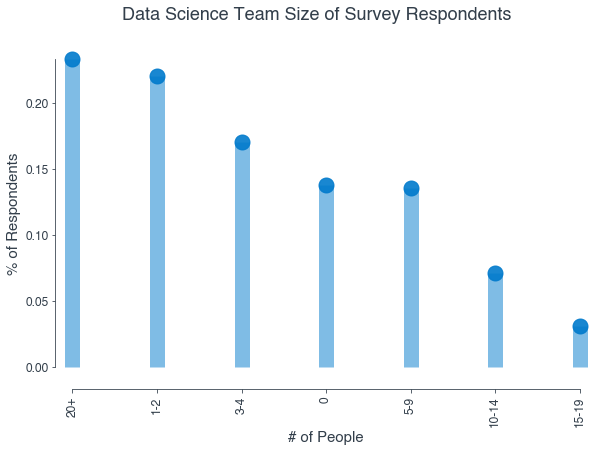

In [197]:
# Creating Data Science Team Size Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(ds_teamsize_freq.index)+1))

fig, ax = plt.subplots(figsize=(10,6))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=ds_teamsize_freq['ds_teamsize'], color='#007ACC', alpha=0.5, linewidth=15)

# create for each bin a dot at the level of the expense percentage value
plt.plot(my_range, ds_teamsize_freq['ds_teamsize'], "o", markersize=15, color='#007ACC', alpha=0.9)

# set labels
ax.set_xlabel('# of People', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, ds_teamsize_freq['index'], rotation=45)

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.05, 0.03)
ax.set_xticklabels(ds_teamsize_freq['index'], rotation=90)

# add ds_teamsize
fig.suptitle('Data Science Team Size of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('teamsize_freq.png', dpi=300, bbox_inches='tight')

In [198]:
# Creating larger bins for compensation
mc['compensationhi'] = mc['compensation'].str.extract(r'(?<=-|\$)(.*$)')
mc['compensationhi'] = mc['compensationhi'].str.replace(',','')
mc['compensationhi'] = mc['compensationhi'].str.replace('-','')
mc['compensationhi'] = mc['compensationhi'].str.replace('<','')
mc['compensationhi'] = mc['compensationhi'].astype(float)
mc['compensationbins'] = pd.cut(mc['compensationhi'], [0, 50000, 100000, 200000, 300000, 500000, 1000000], 
                                labels=['$0-50K', '$50-100K', '$100-200K', '$200-300K', '$300-500K', '$500K+'])

In [199]:
# Creating Compensation Frequency Table
compensationbins_freq = mc['compensationbins'].value_counts(normalize=True)
compensationbins_freq = compensationbins_freq.reset_index()
compensationbins_freq = compensationbins_freq.sort_index(axis=0)
compensationbins_freq = pd.DataFrame(compensationbins_freq)

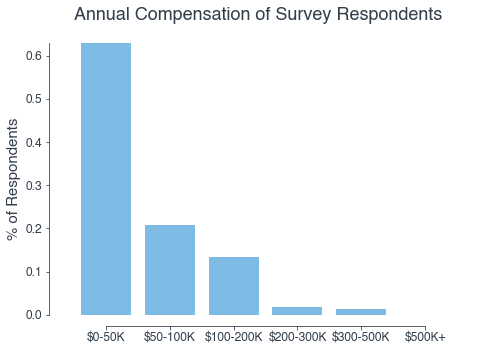

In [200]:
# Creating Compensation Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(compensationbins_freq.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=compensationbins_freq['compensationbins'], color='#007ACC', alpha=0.5, linewidth=50)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, compensationbins_freq['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.2, 0)

# add title
fig.suptitle('Annual Compensation of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('compensationbins_freq.png', dpi=300, bbox_inches='tight')

In [201]:
# Renaming bins for dollars spent
rename = {'$0 (USD)':'$0','$100-$999':'$100-$1k',
          '$1000-$9,999':'$1K-$10K','$1-$99':'$1-$100',
          '$10,000-$99,999':'$10K-$100K','> $100,000 ($USD)':'$100K+'}
mc['dollars_mlorcloud'] = mc['dollars_mlorcloud'].replace(rename)

In [202]:
# Creating dollars spent Frequency Table
dollars_mlorcloud = mc['dollars_mlorcloud'].value_counts(normalize=True)
dollars_mlorcloud = dollars_mlorcloud.reset_index()
dollars_mlorcloud = dollars_mlorcloud.sort_index(axis=0)
dollars_mlorcloud = pd.DataFrame(dollars_mlorcloud)

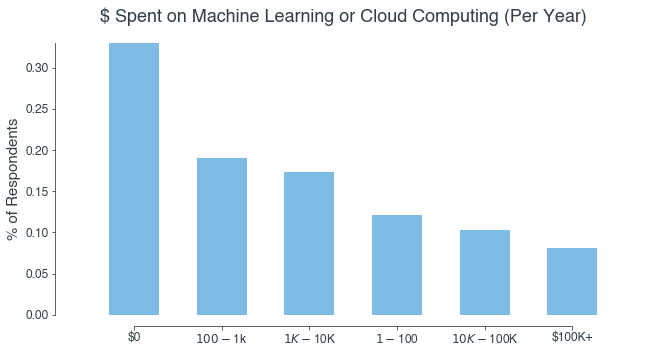

In [203]:
# Creating Dollars Spent Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(dollars_mlorcloud.index)+1))

fig, ax = plt.subplots(figsize=(11,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=dollars_mlorcloud['dollars_mlorcloud'], color='#007ACC', alpha=0.5, linewidth=50)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, dollars_mlorcloud['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.2, 0)

# add title
fig.suptitle('$ Spent on Machine Learning or Cloud Computing (Per Year)', fontsize=18, fontweight='black')

plt.savefig('dollars_mlorcloud.png', dpi=300, bbox_inches='tight')

In [204]:
# Renaming bins for machine learning years
mc['ml_years'] = mc['ml_years'].str.replace(' years', '')

# Creating machine learning years spent Frequency Table
ml_years = mc['ml_years'].value_counts(normalize=True)
ml_years = ml_years.reset_index()
ml_years = ml_years.sort_index(axis=0)
ml_years = pd.DataFrame(ml_years)

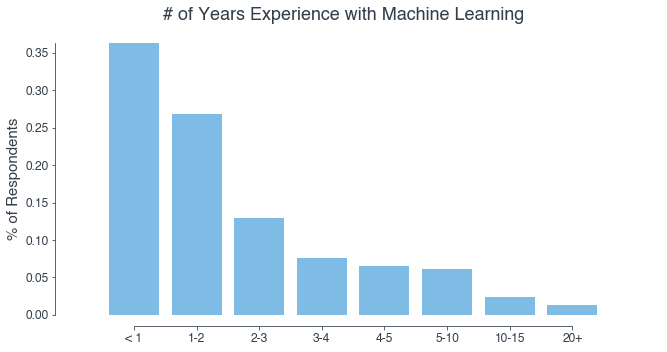

In [205]:
# Creating machine learning years Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(ml_years.index)+1))

fig, ax = plt.subplots(figsize=(11,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=ml_years['ml_years'], color='#007ACC', alpha=0.5, linewidth=50)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, ml_years['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.2, 0)

# add title
fig.suptitle('# of Years Experience with Machine Learning', fontsize=18, fontweight='black')

plt.savefig('ml_years.png', dpi=300, bbox_inches='tight')

## EDA Visualizations and Analysis
<img src="age_freq.png" width="80%">
Survey responses seem to be distributed somewhat normally, with a high percentage in the range of 22-34 years old.

<img src="title_freq.png" width="60%">
A large percentage of the survey sample are either Data Scientists or Students. This likely explains the younger age distribution of respondents. As students will not be likely to attract a high degree of value in any consulting-based marketplace, this will be an interesting field to use as a filter in our analysis.

<img src="country_freq.png" width="80%">
Respondents were most likely to live in India or the United States, with no other country accounting for more than 5% of the overall population.

<img src="gender_freq.png" width="60%">
The survey sample is very male-dominant, with less than 20% of female respondents.

<img src="education_freq.png" width="60%">
The survey sample is highly educated, with the vast majority having obtained at least a Bachelor's degree.

<img src="teamsize_freq.png" width="60%">

15% of survey respondents responded that they worked on a Data Science of less than 3 people. All other respondents are a part of a larger Data Science team. The most popular response was the largest option given, teams of 20 or more members. This is very relevant for our question about a freemium enterprise-based kernel service.

<img src="compensationbins_freq.png" width="60%">

The annual compensation of Kaggle users is heavily dominated by employees making less than 50k per year. This is a relevant fact in our "freemium" service proposal, as many will be unlikely to personally have considerable margin for a paid service.

<img src="dollars_mlorcloud.png" width="60%">
Over 60% of survey resondents work for companies who spent nothing on Machine Learning or Cloud Computing in the previous year. As such, they are unlikely to have significant expertise working with these technologies.

<img src="ml_years.png" width="60%">

Similar to the above diagram, over 60% of the respondents have more than 2 years of experience using Machine learning. Accordingly, they will have limited expertise in this field.

## EDA Results

After revieiwing the categorical variables, several important insights stand out:

* Over 20% of the survey respondents are students, and as such are not likely to help drive revenue in either a freemium kernel product or a consulting marketplace. Their information should be removed to further evaluate Kaggle's target market for these products.
* Nearly 25% of respondents currenlty reside in India, and a significant majority live outside the United States, which could make users more likely to engage in a remote consulting marketplace product.
* Over 65% of respondents currently work on a Data Science team of 3 or more people, and over 20% work on a team of 1-2 people. As a result, the vast majority of Kaggle customers are already working collaboratively on data-science related products.
* Over 60% of respondents make less than 50K per year. As a result, they are not likely to have a large amount of discretionary income for paid Data Science collaboration services.
* Over 60% of respondents work for companies who have spent nothing on Machine Learning or Cloud Computing, and have personally spent less than 2 years working with Machine Learning products.

# Further Analysis

To continue our analysis, we will focus our dataset on only those respondents who are currently working in the data science/analysis field. These respondents are most likely to use any Kaggle products and contribute to increased revenue. To do this, we will remove `'student'` values from the dataset.

In [206]:
# Get names of indexes for which title is student.
indexNames = mc[mc['title'] == 'Student' ].index
 
# Delete these row indexes from dataFrame
mcclean = mc.drop(indexNames)
print(len(mc)-len(mcclean))

4014


We have now removed over 4000 responses that are irrelevant for our analysis. With this new dataset, we can focus on exploring our hypothesis, that a kernel freemium service will provide more potential revenue than a consulting marketplace.

## Potential for Freemium Service

First, we will explore the adjusted compensation percentages, having removed students (more likely to be unemployed or underemployed) from the sample.

In [207]:
# Creating Compensation Frequency Table
compensationbins_clean = mcclean['compensationbins'].value_counts(normalize=True)
compensationbins_clean = compensationbins_clean.reset_index()
compensationbins_clean = compensationbins_clean.sort_index(axis=0)
compensationbins_clean = pd.DataFrame(compensationbins_clean)
print(compensationbins_clean)

       index  compensationbins
0     $0-50K          0.628711
1   $50-100K          0.206930
2  $100-200K          0.133392
3  $200-300K          0.018404
4  $300-500K          0.012563
5     $500K+          0.000000


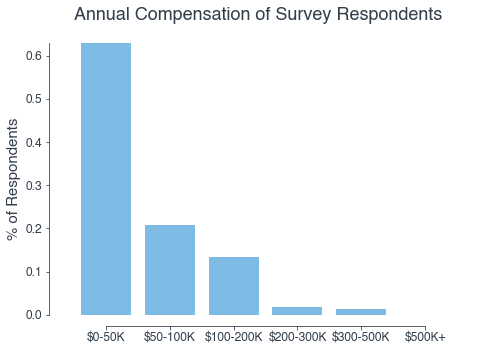

In [208]:
# Creating Compensation Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(compensationbins_freq.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=compensationbins_clean['compensationbins'], color='#007ACC', alpha=0.5, linewidth=50)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, compensationbins_clean['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.2, 0)

# add title
fig.suptitle('Annual Compensation of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('compensationbins_clean.png', dpi=300, bbox_inches='tight')

Working with this smaller sample, the compensation numbers are still skewed largely to the lower-end. Over 60% of non-student Kaggle users make less than 50k per year. This means they are probably less likely to have discretionary income for a paid-subscription service.

Next, we will use this reduced sample size to see how many respondents are a part of a large data science team, which would require collaboration on data science projects.

In [209]:
# Creating Data Science Team Size Frequency Table
ds_teamsize_clean = mcclean['ds_teamsize'].value_counts(normalize=True)
ds_teamsize_clean = ds_teamsize_clean.reset_index()
ds_teamsize_clean = ds_teamsize_clean.sort_index(axis=0)
ds_teamsize_clean = pd.DataFrame(ds_teamsize_clean)
print(ds_teamsize_clean.head())

  index  ds_teamsize
0   20+     0.233282
1   1-2     0.220583
2   3-4     0.170227
3     0     0.138002
4   5-9     0.135580


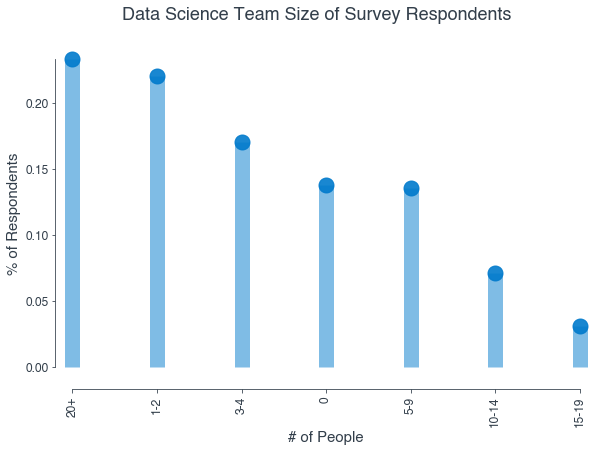

In [210]:
# Creating Data Science Team Size Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(ds_teamsize_freq.index)+1))

fig, ax = plt.subplots(figsize=(10,6))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=ds_teamsize_clean['ds_teamsize'], color='#007ACC', alpha=0.5, linewidth=15)

# create for each bin a dot at the level of the expense percentage value
plt.plot(my_range, ds_teamsize_clean['ds_teamsize'], "o", markersize=15, color='#007ACC', alpha=0.9)

# set labels
ax.set_xlabel('# of People', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, ds_teamsize_clean['index'], rotation=45)

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.05, 0.03)
ax.set_xticklabels(ds_teamsize_freq['index'], rotation=90)

# add ds_teamsize
fig.suptitle('Data Science Team Size of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('teamsize_freq.png', dpi=300, bbox_inches='tight')

After removing students from the survey data, over 53% of respondents are on a data science team of 3 or more, with over 23% on a team of 20+ people. In addition, 22% are on a team of 1-2, which could mean additional opportunity for collaboration in this space.

Given this number, it seems as though the overall number of people who might be interested in a collaborative freemium service is noteable.

However, from the exploratory analysis above, it seems as though most respondents come from companies that spend little to no money on products like Machine Learning and Cloud Computing. To explore further, we will analyze the size of companies represented by survey respondents.

In [211]:
print(mcclean['comp_size'].unique())

['1000-9,999 employees' '> 10,000 employees' nan '0-49 employees'
 '50-249 employees' '250-999 employees']


In [212]:
# Renaming bins for company size
rename = {'1000-9,999 employees':'1k - 10k','> 10,000 employees':'10k+',
          '0-49 employees':'0 - 50','50-249 employees':'50 - 250',
          '250-999':'250 - 1k'}
mcclean['comp_size'] = mc['comp_size'].replace(rename)

In [213]:
# Creating company size Frequency Table
comp_size = mcclean['comp_size'].value_counts(normalize=True)
comp_size = comp_size.reset_index()
comp_size = comp_size.sort_index(axis=0)
comp_size = pd.DataFrame(comp_size)
print(comp_size.head())

               index  comp_size
0             0 - 50   0.287459
1               10k+   0.225682
2           1k - 10k   0.188616
3           50 - 250   0.166333
4  250-999 employees   0.131910


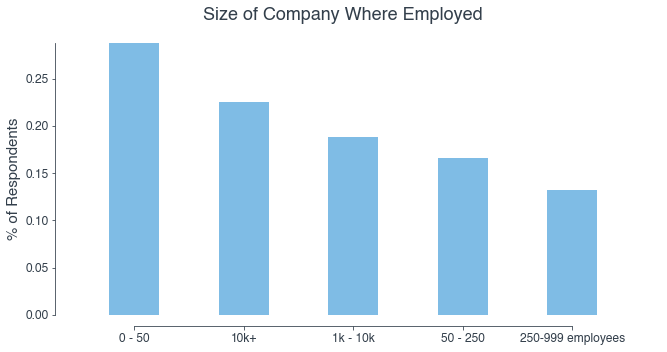

In [214]:
# Creating Company Size  Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(comp_size.index)+1))

fig, ax = plt.subplots(figsize=(11,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=comp_size['comp_size'], color='#007ACC', alpha=0.5, linewidth=50)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, comp_size['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.2, 0)

# add title
fig.suptitle('Size of Company Where Employed', fontsize=18, fontweight='black')

plt.savefig('comp_size_clean.png', dpi=300, bbox_inches='tight')

According to this information, over 58% of survey respondents work in companies with less than 1,000 employees. These companies will likely be unable to pay for an Enterprise-level freemium subscription for their employees. As noted above, most indididuals in the sample are also unlikely to purchase a subscription due to relatively low annual compensation.

This means that Kaggle would be reliant upon "mid-tier" priced subscriptions, for users whose companies are large enough to support a data science team but not large enough to justify an enterprise solution.

## Result of Analysis

Given the relatively low compensation rates of Kaggle users, it is unlikely that individual customers will sign up for a paid model in large numbers. And since the majority of Kaggle users come from companies of less than 1,000 employees, it is unlikely that large-scale enterprise subscriptions will be a significant revenue driver.

Even when considering the potential value increase that a freemium kernal product could provide [through increasing overall exposure and access](https://hbr.org/2018/06/why-microsoft-is-willing-to-pay-so-much-for-github), adding a freemium product is not likely to increase the overall Kaggle userbase. GitHub seems to be the dominant player in this market segment, and the cost of creating and marketing a unique freemium service would likely be cost-prohibitive.

According to this analysis of the current Kaggle customer base, it is unlikely that a kernel subscription service will be able to generate substantial new revenue for the company.

## Potential for Consulting Marketplace

When considering the potential value of providing a consulting marketplace, there are several factors to consider:

* The brand awareness to attract companies with a need for outside talent.
* The availability of talented users to provide meaningful solutions.

### Attracting Contract Employers

The provided dataset includes some interesting information related to these two factors.

Whereas small company size is a negative factor in driving enterprise subscriptions, smaller companies are more likely to need outside help for data science needs. 58% of Kaggle users work in companies under 1,000, and 52% of users work on a data science team of less than five people. For companies such as these, a reputable contract-based marketplace could be incredibly helpful.

In addition, Kaggle's current revenue sources come largely from company-driven competitions, a segment of which are focused specifically on finding creative crowd-sourced solutions for company problems. The potential for attracting companies with a need for outside, consultant-based talent is readily available.

### Attracting Talented Contractors

In addition, the survey data shows that Kaggle is already connected with a valuable pool of potential contract-based employees. As noted above, over 60% of respondents make less than 50k per year, which could be a helpful indicator of users looking to profit from contract-based data science work. The popularity of Kaggle competitions, prize winners receiving cash prizes, is an obvious indicator that Kaggle is readily connected with potential data science contractors.

Also, there is a highly-qualified subset of Kaggle Users which could demand high-dollar contracts, thus increasing revenue potential for the company.

In [215]:
# Creating Education Frequency Table
education_freq_clean = mcclean['education'].value_counts(normalize=True)
education_freq_clean = education_freq_clean.reset_index()
gender_freq_clean = education_freq_clean.sort_index(axis=0)
education_freq_clean = pd.DataFrame(education_freq_clean)
education_freq_clean.head()

,index,education
0,Master’s degree,0.461297
1,Bachelor’s degree,0.275132
2,Doctoral degree,0.161147
3,Some college,0.035731
4,Professional degree,0.035731


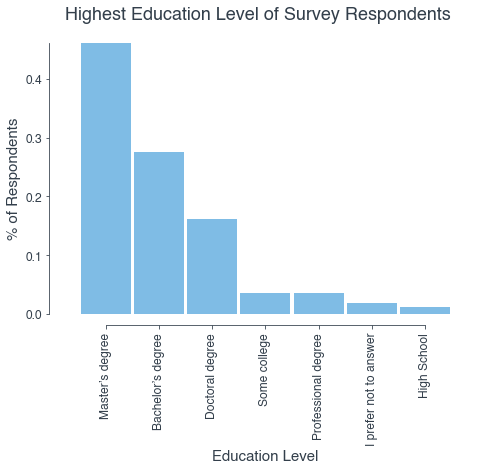

In [216]:
# Creating Education Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(education_freq_clean.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=education_freq_clean['education'], color='#007ACC', alpha=0.5, linewidth=50)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Education Level', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, education_freq_clean['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.2, 0)
ax.set_xticklabels(education_freq['index'], rotation=90)

# add title
fig.suptitle('Highest Education Level of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('education_freq_clean.png', dpi=300, bbox_inches='tight')

When "student" respondents are removed, over 62% of Kaggle users hold at least a Master's degree, with 16% holding a doctoral degree.

Add to this the factor that nearly 25% of Kaggle respondents are from India, and over 80% live outside the United States, and there is a vast majority of users that could potentially be interested in a remote, consulting-based opportunity.

# Final Conclusions #

After exploring the results of a Kaggle user survey, our initial hypothesis is disproven. Because of the proliferation of free collaborative environments like GitHub, and the unlikely customer base for personal or enterprise subscriptions, a freemium service seems likely to increase revenue only marginally. In contrast, because of Kaggle's readily available connections with motivated employers in need of outside help, and a large user base of high-skilled potential contractors, a contractor marketplace could drive much more revenue for the cost of implementation.

As a result of this analysis, we can determine that **Kaggle is more likely to drive significant future revenue from a monetized consultant marketplace, rather than a freemium kernel product.**